Python Project - Marvel Mart Project    
Yinhui Yang (Kami)    
03/14/2021

Question 1

In [2]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Part 1: Cleaning the data

In [3]:
df = pd.read_csv('DataSamples/MM_Sales.csv')
df.head()

# clean data and fill values with "NULL" 
df['Order Priority'].isnull()
df['Order Priority'].fillna('NULL', inplace=True)
# clean data and fill values with "NULL" 
print(df['Item Type'].isnull().sum())
df['Item Type'].fillna('NULL', inplace=True)
# clean data and replace values to string "NULL"
print(df['Country'].isnull().sum())
df['Country'] = df['Country'].apply(lambda x: x if isinstance(x, str) else "NULL")
df['Country'].fillna("NULL", inplace=True)
# clean data and order id to numeric values, exception
print(df['Order ID'].isnull().sum())
df['Order ID'] = pd.to_numeric(df['Order ID'],errors='coerce')
# clean data and replace numeric values to 0
print(df['Order ID'].isnull().sum())
df['Order ID'].fillna(0, inplace=True)

6
0
0
5


In [4]:
#creat data copy
dfClean = df.copy() 

In [5]:
#check data
dfClean = dfClean[dfClean['Order Priority'] != 'NULL']
dfClean = dfClean[dfClean['Item Type'] != 'NULL']
dfClean = dfClean[dfClean['Country'] != 'NULL']
dfClean = dfClean[dfClean['Order ID'] != 0]

In [6]:
#check data and print 
print(dfClean['Order Priority'][dfClean['Order Priority'] == 'NULL'].count())
print(dfClean['Item Type'][dfClean['Item Type'] == 'NULL'].count())
print(dfClean['Country'][dfClean['Country'] == 'NULL'].count())
print(dfClean['Order ID'][dfClean['Order ID'] == 0].count())

dfClean.to_csv('MM_Sales_Clean..csv')

0
0
0
0


In [7]:
# create a new clean data file
DF_Clean = pd.read_csv('MM_Sales_Clean.csv')

Part 2: General Statistics

In [34]:
Rankingfile = open('MM_Rankings.txt', 'w')
Rankingfile = open('MM_Rankings.txt', 'a+')

Part 2 Q1

In [35]:
countries = DF_Clean['Country']
SalesCount = dict.fromkeys(countries, 0)

# Country sale transactions count 
for country in countries:
    SalesCount[country] += 1
    
# Countries of sales transaction count
countriesCount = sorted(SalesCount, key=lambda x: SalesCount[x], reverse=True)
# top 10 countries
top10Countries = countriesCount[:10]
# List of countries from Part 2 Q1.1.1
countrylist = ['Trinidad and Tobago', 'Guinea', 'Maldives']

# Shipping center build list for country 
for country in top10Countries:
    if country not in countrylist:
        countryBuildList = country
        break
        
# Solution for Part 2 Q1.2
print('Countries Most Sale Transactions:', file=Rankingfile)
for country in top10Countries:
    print(country + ': ' + str(SalesCount[country]), file=Rankingfile)
print('The country we should build our shipping center is ' + countryBuildList + \
      ' because this is the country which we had the highest sales number for' + \
      'transactions and we do not have a shipping center at the current location.', file=Rankingfile)

Part 2 Q2.1

In [31]:
SC = DF_Clean['Sales Channel']
dictSC_Count = dict.fromkeys(SC, 0)

# Sale channels counts.
for ch in SC:
    dictSC_Count[ch] += 1
    
# solution write in to Randing file
print('\nSales Channel Order Count', file=Rankingfile)
for ch in dictSC_Count:
    print(ch + ': ' + str(dictSC_Count[ch]), file=Rankingfile)
channelsCount = sorted(dictSC_Count, key=lambda x: dictSC_Count[x], reverse=True)
print('We do more ' + channelsCount[0] + ' sales.', file=Rankingfile)

Part 2 Sales Channel Pie chart

Sales Channel
Offline    19788
Online     30183
Name: Sales Channel, dtype: int64


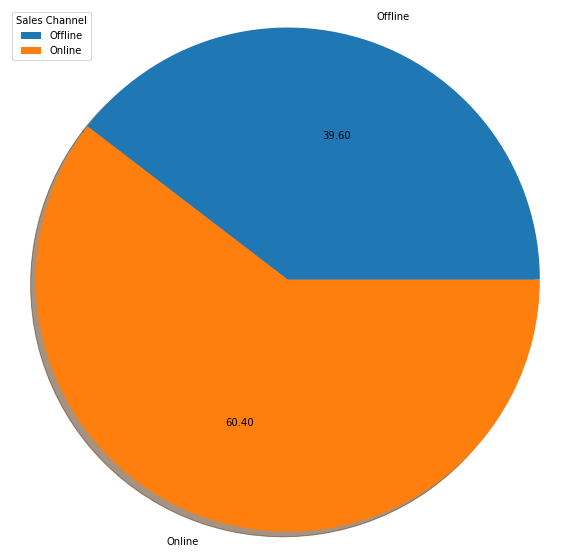

In [18]:
# chart value grouby and count from clean file
channels = DF_Clean.groupby(['Sales Channel'])
channelsCount = channels['Sales Channel'].count()

print(channelsCount)

plt.figure(figsize=(10, 10))
plt.pie(channelsCount, labels=channelsCount.index, shadow=True, autopct='%.2f')
plt.axis('equal')  
plt.legend(loc=2, title='Sales Channel')
plt.show()

Part 2 Q2.2

In [32]:
OP = DF_Clean['Order Priority']
dictOP_Count = dict.fromkeys(OP, 0)

# Order Priorities counts.
for P in OP:
    dictOP_Count[P] += 1
    
# Write in to Randing file
print('\nOrder Priority Count', file=Rankingfile)
for P in dictOP_Count:
    print(P + ': ' + str(dictOP_Count[P]), file=Rankingfile)
OrderPriorityCount = sorted(dictOP_Count, key=lambda x: dictOP_Count[x], reverse=True)
print('We do more ' + OrderPriorityCount[0] + ' order priorities.', file=Rankingfile)

Part 2 Sales Channel Pie chart

Order Priority
C     5012
H    15094
L     9984
M    19881
Name: Order Priority, dtype: int64


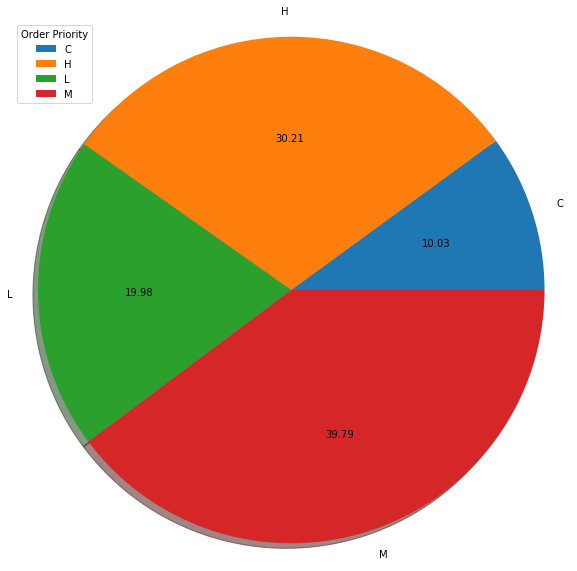

In [20]:
# chart value grouby and count from clean file
Priorities = DF_Clean.groupby(['Order Priority'])
OrderPriorityCount = Priorities['Order Priority'].count()

print(OrderPriorityCount)

plt.figure(figsize=(10, 10))
plt.pie(OrderPriorityCount, labels=OrderPriorityCount.index, shadow=True, autopct='%.2f')
plt.axis('equal')  
plt.legend(loc=2, title='Order Priority')
plt.show()

Part 2 Boxplot of Total Profits DISTRIBUTION

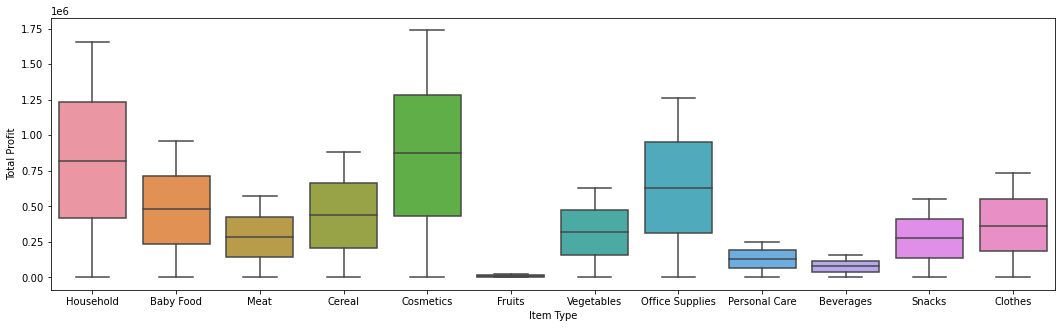

In [21]:
import warnings
warnings.simplefilter(action='ignore')
# boxplot data from clean file
plt.figure(figsize=(18, 5))
ax = sns.boxplot(DF_Clean['Item Type'], DF_Clean['Total Profit'][0:50000])

Part 2 Q3 2-3

Item Type
Baby Food         1942865748.120
Beverages          327559249.080
Cereal            1824726412.290
Clothes           1520832019.680
Cosmetics         3638407966.750
Fruits              51010570.920
Household         3401180998.060
Meat              1196342404.400
Office Supplies   2605440187.500
Personal Care      535250525.600
Snacks            1149715758.720
Vegetables        1322639660.240
Name: Total Profit, dtype: float64


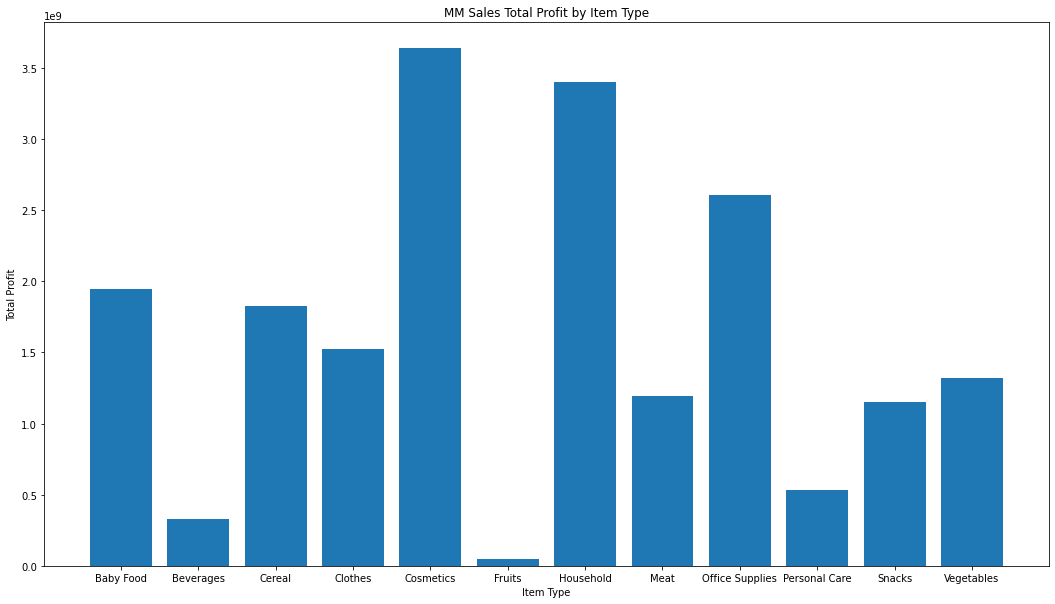

In [22]:
# value grouby and cum from clean file
ItemType = DF_Clean.groupby(['Item Type'])
TotalProfitSum = ItemType['Total Profit'].sum()

print(TotalProfitSum)

plt.figure(figsize=(18, 10))

plt.bar(TotalProfitSum.index, TotalProfitSum.values)
plt.title('MM Sales Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.show()

Part 2 Q3 4

In [36]:
# data relevance to Part 2 Q3 above.
TotalProfitSum = {'Cosmetics': 3638407966.750,
                  'Household': 3401180998.060,
                  'Office Supplies': 2605440187.500,
                  'Baby Food': 1942865748.120,
                  'Cereal': 1824726412.290,
                  'Clothes': 1520832019.680,
                  'Vegetables': 1322639660.240,
                  'Meat': 1196342404.400,
                  'Snacks': 1149715758.720,
                  'Personal Care': 535250525.600,
                  'Beverages': 327559249.080,
                  'Fruits': 51010570.920,}
# Total profit sorted from Total profit sums.
TotalProfitSorted = sorted(TotalProfitSum.items(), key=lambda x:'%.3f'%(1), reverse=True)
# Top 3 Item Types from Total profit
top3_ItemTypes = TotalProfitSorted[:3]
print(top3_ItemTypes)
#solution write in to Randing file
with open('MM_Rankings.txt', 'a+') as writer:
    writer.write('Item 1: Cosmetics\n')
    writer.write('Item 2: Household\n')
    writer.write('Item 3: Office Supplies\n')
    writer.write('We profited from Cosmetics the most.\n')

[('Cosmetics', 3638407966.75), ('Household', 3401180998.06), ('Office Supplies', 2605440187.5)]


Part 2 Boxplot of Total Profits DISTRIBUTION Discusstion

Boxplot is a standardized method for displaying data distribution based on five figures: minimum, first quartile, median, third quartile, and maximum. In the simplest Boxplot, the central rectangle spans from the first quartile to the third quartile. Segments in the rectangle show the middle value, and whiskers are displayed above and below the box, showing the positions of the minimum and maximum values. Accordingly, this boxplot image shows us the combinations with the Top 3 Total Profits by Item Type and the rectangle span are Cosmetic, Household, and Office Supplies. Segments in the rectangle show intermediate values of 0.9, 0.8, and 0.7, respectively.

Part 2 Q4 1

In [43]:
# Sum of Units Sold, Unit Cost, Total Revenue, Total Cost, Total Profit
UnitsSoldSum = DF_Clean['Units Sold'].sum()
UnitCostSum = DF_Clean['Unit Cost'].sum()
TotalRevenueSum = DF_Clean['Total Revenue'].sum()
TotalCostSum = DF_Clean['Total Cost'].sum()
TotalProfitSum = DF_Clean['Total Profit'].sum()

print(f'Sum of Units Sold:', UnitsSoldSum)
print(f'Sum of Units Cost:', UnitCostSum)
print(f'Sum of Total Revenue:', TotalRevenueSum)
print(f'Sum of Total Cost:', TotalCostSum)
print(f'Sum of Total Profit:', TotalProfitSum)
#solution write in to MM_Calc file
with open('MM_Calc.txt', 'a+') as writer:
    writer.write('Sums:\n')
    writer.write('Units Sold: 249818150\n')
    writer.write('Units Cost: 9360768.320000002\n')
    writer.write('Total Revenue: 66145004417.17\n')
    writer.write('Total Cost: 46629032915.81\n')
    writer.write('Total Profit: 19515971501.36\n')

Sum of Units Sold: 249818150
Sum of Units Cost: 9360768.320000002
Sum of Total Revenue: 66145004417.17
Sum of Total Cost: 46629032915.81
Sum of Total Profit: 19515971501.36


Part 2 Q4 2

In [44]:
# Average for Units Sold, Unit Cost, Total Revenue, Total Cost, Total Profit
UnitsSoldAverage = DF_Clean['Units Sold'].mean()
UnitCostAverage = DF_Clean['Unit Cost'].mean()
TotalRevenueAverage = DF_Clean['Total Revenue'].mean()
TotalCostAverage = DF_Clean['Total Cost'].mean()
TotalProfitAverage = DF_Clean['Total Profit'].mean()

print(f'Average of Units Sold:', UnitsSoldAverage)
print(f'Average of Units Cost:', UnitCostAverage)
print(f'Average of Total Revenue:', TotalRevenueAverage)
print(f'Average of Total Cost:', TotalCostAverage)
print(f'Average of Total Profit:', TotalProfitAverage)
#solution write in to MM_Calc file
with open('MM_Calc.txt', 'a+') as writer:
    writer.write('\nAverages:\n')
    writer.write('Units Sold: 4999.262572291929\n')
    writer.write('Units Cost: 187.32401432829784\n')
    writer.write('Total Revenue: 1323667.8156764843\n')
    writer.write('Total Cost: 933121.8690002197\n')
    writer.write('Total Profit: 390545.94667627424\n')

Average of Units Sold: 4999.262572291929
Average of Units Cost: 187.32401432829784
Average of Total Revenue: 1323667.8156764843
Average of Total Cost: 933121.8690002197
Average of Total Profit: 390545.94667627424


Part 2 Q4 3

In [45]:
# Maximum Units Sold, Unit Cost, Total Revenue, Total Cost, Total Profit
UnitsSoldMaximum = DF_Clean['Units Sold'].max()
UnitCostMaximum = DF_Clean['Unit Cost'].max()
TotalRevenueMaximum = DF_Clean['Total Revenue'].max()
TotalCostMaximum = DF_Clean['Total Cost'].max()
TotalProfitMaximum = DF_Clean['Total Profit'].max()

print(f'Maximum of Units Sold:', UnitsSoldMaximum)
print(f'Maximum of Units Cost:', UnitCostMaximum)
print(f'Maximum of Total Revenue:', TotalRevenueMaximum)
print(f'Maximum of Total Cost:', TotalCostMaximum)
print(f'Maximum of Total Profit:', TotalProfitMaximum)
#solution write in to MM_Calc file
with open('MM_Calc.txt', 'a+') as writer:
    writer.write('\nMaximum:\n')
    writer.write('Units Sold: 10000\n')
    writer.write('Units Cost: 524.96\n')
    writer.write('Total Revenue: 6682031.73\n')
    writer.write('Total Cost: 5249075.04\n')
    writer.write('Total Profit: 1738178.39\n')

Maximum of Units Sold: 10000
Maximum of Units Cost: 524.96
Maximum of Total Revenue: 6682031.73
Maximum of Total Cost: 5249075.04
Maximum of Total Profit: 1738178.39


Part 2 Q4 4

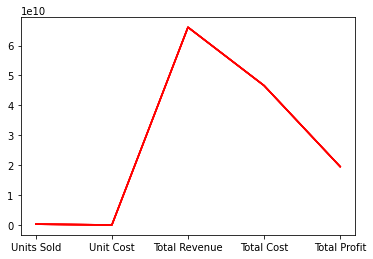

In [53]:
# Linepolt value input
x=['Units Sold','Unit Cost','Total Revenue','Total Cost','Total Profit']
y=[249818150, 9360768, 66145004417, 46629032915, 19515971501]

w=[4999, 187, 1323667, 933122, 390546]
w1=[10000, 525, 6682031, 5249075, 1738178]

for i, xi in enumerate(x):
    plt.plot(x,y, '-r')    

plt.show()

Part 3

In [54]:
import warnings
warnings.simplefilter(action='ignore')

csv_file = "Countries_By_Region.csv"

dictionary = {'Asia': ['Mongolia','Turkmenistan','Maldives','Laos','Sri Lanka','Bangladesh','Myanmar','China'
                       'South Korea','Philippines','Kazakhstan','Taiwan','Bhutan','Malaysia',
                       'Vietnam','Kyrgyzstan','Singapore','Japan','Uzbekistan','Brunei','Indonesia',
                       'Cambodia','India','Tajikistan','Nepal','Thailand','North Korea'],
              'Middle East and North Africa': ['Saudi Arabia','Oman','Israel','Morocco','Qatar',
                                                'Algeria','Libya','Azerbaijan','Yemen','United Arab Emirates',
                                                'Iraq','Egypt','Turkey','Iran','Kuwait','Lebanon','Bahrain',
                                                'Jordan','Somalia','Pakistan','Syria','Afghanistan','Tunisia'],
              'North America': ['United States of America','Canada','Mexico','Greenland'],
              'Center America and the Caribbean': ['Jamaica','Panama','Belize','The Bahamas','Honduras','Grenada',
                                                   'Barbados','Dominican Republic','Antigua and Barbuda','Guatemala',
                                                   'Dominica','Saint Kitts and Nevis','Saint Lucia','Trinidad and Tobago',
                                                   'Cuba','Saint Vincent and the Grenadines','Haiti','El Salcador',
                                                   'Nicaragua','Costa Rica'],
              'Sub-Saharan Africa': ['Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cape Verde',
                                     'Central African Republic','Chad','Comoros','Cote d‘Ivoire','Democratic Republic of the Congo'
                                     'Djibouti','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Ghana','Guinea','Guinea-Bissau'
                                     'Kenya','Lesotho','Liberia','Madagascar','Malawi','Mali','Mauritania','Mauritius','Mozambique'
                                     'Namibia','Niger','Nigeria','Republic of the Congo','Rwanda','Sao Tome and Principe'
                                     'Senegal','Seychelles','Sierra Leone',
South Africa
South Sudan
Sudan
Swaziland
Tanzania
The Gambia
Togo
Uganda
Zambia
Zimbabwe],
              'Australia and Oceania': ['Fiji','Palau','Australia','Marshall Islands','Federated States of Micronesia','East Timor',
                                        'Samoa','New Zealand','Tuvalu','Nauru','Solomon Islands','Vanuatu','Kiribati','Paua New Guinea',
                                        'Tonga'],
              'Europe': ['Albania','Andorra','Armenia','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia'
                         'Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary',
                         'Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia',
                         'Malta','Moldova', 'Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russia'
                         'San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom',
                         'Vatican City']}

with open ('Countries_By_Region.csv','w+') as csv_file:
    header = ['Asia','Middle East and North Africa','North America','Center America and the Caribbean','Sub-Saharan Africa','Australia and Oceania','Europe']
    csv_writer = csv.DictWriter(csv_file,fieldnames=header)
    csv_writer.writeheader()
    csv_writer.writerow(dictionary) 